In [1]:
import csv

In [2]:
file = open('Salary.csv')

type(file)

_io.TextIOWrapper

In [3]:
csvreader = csv.reader(file)

In [4]:
header = []
header = next(csvreader)
header

['', 'PHD', 'MBA', 'experience', 'salary']

In [5]:
rows = []
for row in csvreader:
        rows.append(row)
rows

[['0', '0', '0', '1', '95680.89008'],
 ['1', '0', '0', '2', '85360.44112'],
 ['2', '0', '0', '3', '109604.7703'],
 ['3', '0', '1', '4', '124632.2667'],
 ['4', '0', '1', '5', '115637.9933'],
 ['5', '0', '0', '6', '107554.6795'],
 ['6', '0', '0', '7', '173140.4631'],
 ['7', '0', '0', '8', '145713.6909'],
 ['8', '0', '1', '9', '179704.0879'],
 ['9', '0', '1', '10', '169442.2813'],
 ['10', '0', '0', '11', '132054.7539'],
 ['11', '0', '1', '12', '132791.7079'],
 ['12', '0', '1', '13', '209351.8798'],
 ['13', '0', '1', '14', '178863.1777'],
 ['14', '0', '0', '15', '122491.4413'],
 ['15', '0', '0', '16', '156568.079'],
 ['16', '0', '1', '17', '151133.7818'],
 ['17', '0', '1', '18', '238712.2289'],
 ['18', '0', '1', '19', '169882.3424'],
 ['19', '0', '1', '20', '145812.6666'],
 ['20', '0', '1', '21', '210378.922'],
 ['21', '0', '1', '22', '203959.7595'],
 ['22', '0', '1', '23', '246403.0577'],
 ['23', '0', '1', '24', '220123.1236'],
 ['24', '0', '1', '25', '227794.4223'],
 ['25', '0', '1', '26

In [6]:
file.close()

# using Pandas

In [15]:
import pandas as pd
df= pd.read_csv("Salary.csv")
df



,Unnamed: 0,PHD,MBA,experience,salary
0,0,0,0,1,95680.89008
1,1,0,0,2,85360.44112
2,2,0,0,3,109604.77030
3,3,0,1,4,124632.26670
4,4,0,1,5,115637.99330
...,...,...,...,...,...
195,195,1,1,16,213011.77780
196,196,0,1,17,215620.38280
197,197,0,0,18,188153.44100
198,198,0,1,19,239061.35440


In [16]:
df.columns

Index(['Unnamed: 0', 'PHD', 'MBA', 'experience', 'salary'], dtype='object')

In [17]:
df.salary

0       95680.89008
1       85360.44112
2      109604.77030
3      124632.26670
4      115637.99330
           ...     
195    213011.77780
196    215620.38280
197    188153.44100
198    239061.35440
199    191639.75880
Name: salary, Length: 200, dtype: float64

In [23]:
# block 1 - simple stats
mean1 = df['salary'].mean()
sum1 = df['salary'].sum()
max1 = df['salary'].max()
min1 = df['salary'].min()
count1 = df['salary'].count()
median1 = df['salary'].median() 
std1 = df['salary'].std() 
var1 = df['salary'].var() 

# print block 1
print ('Mean salary: ' + str(mean1))
print ('Sum of salaries: ' + str(sum1))
print ('Max salary: ' + str(max1))
print ('Min salary: ' + str(min1))
print ('Count of salaries: ' + str(count1))
print ('Median salary: ' + str(median1))
print ('Std of salaries: ' + str(std1))
print ('Var of salaries: ' + str(var1))

Mean salary: 183518.1580934501
Sum of salaries: 36703631.61869
Max salary: 342048.8182
Min salary: 62942.00704
Count of salaries: 200
Median salary: 184025.33715
Std of salaries: 51987.35230965559
Var of salaries: 2702684800.168252


In [25]:
# block 2 - group by
#groupby_sum1 = df.groupby(['MBA']).sum() 
groupby_countMBA= df.groupby(['MBA']).count()
#groupby_countPHD = df.groupby(['PHD']).count()

print(groupby_countMBA)
#print(groupby_countPHD)

# print block 2
#print ('Sum of values, grouped by the Country: ' + str(groupby_countMBA))
#print ('Count of values, grouped by the Country: ' + str(groupby_count1))

     Unnamed: 0  PHD  experience  salary
MBA                                     
0            65   65          65      65
1           135  135         135     135


# predict Salary

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
import sklearn.metrics as sm
import matplotlib.pyplot as plt

data = pd.read_csv("salary.csv")
X = data['experience']
y = data['salary']

In [35]:
# check the total null values  in each column since the above shows there are missing value
# based on this those 3 features should be dropped before removing the null values
data.isnull().sum()

Unnamed: 0    0
PHD           0
MBA           0
experience    0
salary        0
dtype: int64

In [28]:
#splitting data into training and test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [29]:
# data transform

X_train = np.array(X_train).reshape((len(X_train),1))
y_train = np.array(y_train).reshape((len(y_train),1))

X_test = np.array(X_test).reshape(len(X_test), 1)
y_test = np.array(y_test).reshape(len(y_test), 1)

In [30]:
# training model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

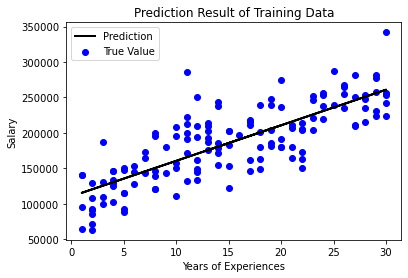

In [31]:
# Predicting Salary using Linear Model

y_train_pred = model.predict(X_train)

plt.figure()
plt.scatter(X_train, y_train, color='blue', label="True Value")
plt.plot(X_train, y_train_pred, color='black', linewidth=2, label="Prediction")
plt.xlabel("Years of Experiences")
plt.ylabel("Salary")
plt.title('Prediction Result of Training Data')
plt.legend()
plt.show()



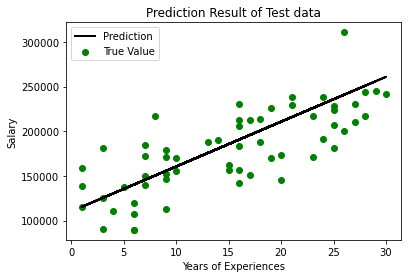

In [32]:
y_test_pred = model.predict(X_test)

plt.figure()
plt.scatter(X_test, y_test, color='green', label='True Value')
plt.plot(X_test, y_test_pred, color='black', linewidth=2, label='Prediction')
plt.xlabel("Years of Experiences")
plt.ylabel("Salary")
plt.title('Prediction Result of Test data')
plt.legend()
plt.show()

In [33]:
# Model Evaluation

print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean squared error = 999240547.7
Explain variance score = 0.54
R2 score = 0.52
